In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Define a simple CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the CNN model
cnn_model = create_cnn_model()
cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test)) # Reduced epochs for demonstration

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"CNN Accuracy: {cnn_accuracy}")

y_pred_cnn = cnn_model.predict(x_test)
y_pred_cnn_classes = y_pred_cnn.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
print(classification_report(y_true_classes, y_pred_cnn_classes))


# Example of another model (a simple Multi-Layer Perceptron)
def create_mlp_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

mlp_model = create_mlp_model()
mlp_model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))


# Evaluate the MLP model
mlp_loss, mlp_accuracy = mlp_model.evaluate(x_test, y_test, verbose=0)
print(f"MLP Accuracy: {mlp_accuracy}")

y_pred_mlp = mlp_model.predict(x_test)
y_pred_mlp_classes = y_pred_mlp.argmax(axis=1)
print(classification_report(y_true_classes, y_pred_mlp_classes))



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3967 - loss: 1.6639 - val_accuracy: 0.6004 - val_loss: 1.1243
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6186 - loss: 1.0784 - val_accuracy: 0.6537 - val_loss: 0.9972
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6770 - loss: 0.9326 - val_accuracy: 0.6685 - val_loss: 0.9627
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7122 - loss: 0.8287 - val_accuracy: 0.6874 - val_loss: 0.9254
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7438 - loss: 0.7391 - val_accuracy: 0.6982 - val_loss: 0.8914
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7682 - loss: 0.6640 - val_accuracy: 0.6947 - val_loss: 0.9003
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7887 - loss: 0.6003 - val_accuracy: 0.7075 - val_loss: 0.8842
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8116 - loss: 0.54

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2774 - loss: 1.9928 - val_accuracy: 0.3702 - val_loss: 1.7485
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3825 - loss: 1.7197 - val_accuracy: 0.4165 - val_loss: 1.6363
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4119 - loss: 1.6460 - val_accuracy: 0.4265 - val_loss: 1.5961
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4302 - loss: 1.5870 - val_accuracy: 0.4347 - val_loss: 1.5755
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4483 - loss: 1.5489 - val_accuracy: 0.4405 - val_loss: 1.5825
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4555 - loss: 1.5267 - val_accuracy: 0.4615 - val_loss: 1.5244
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4639 - loss: 1.4987 - val_accuracy: 0.4518 - val_loss: 1.5279
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4673 - loss: 1.4852

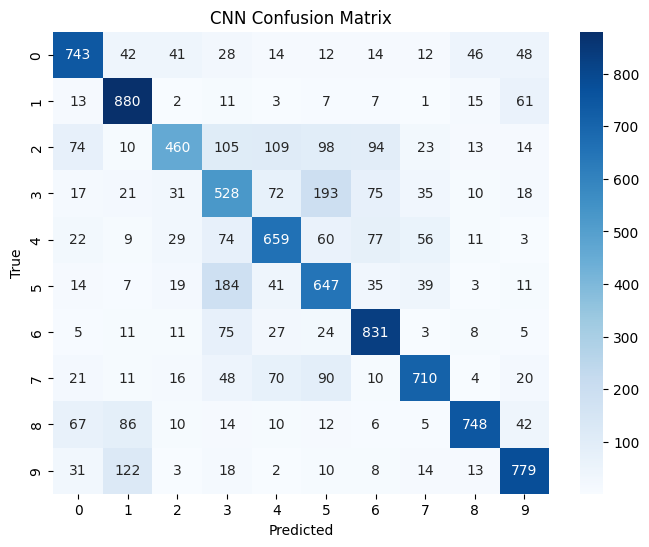

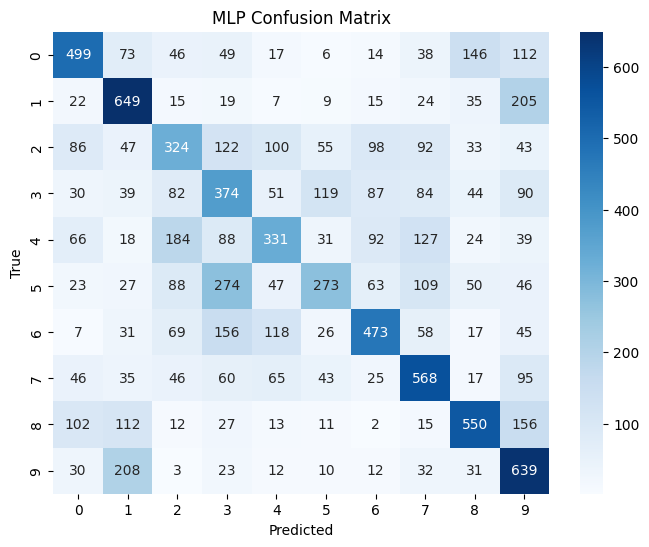

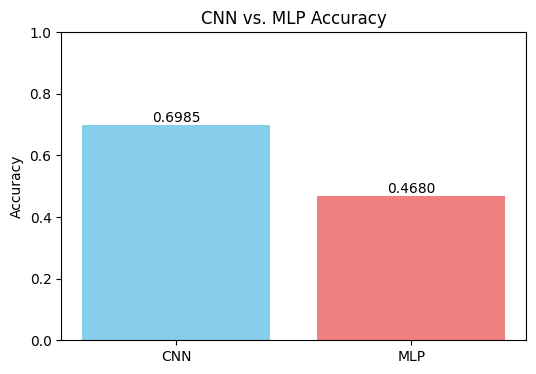

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix for CNN
plot_confusion_matrix(y_true_classes, y_pred_cnn_classes, "CNN Confusion Matrix")

# Plot confusion matrix for MLP
plot_confusion_matrix(y_true_classes, y_pred_mlp_classes, "MLP Confusion Matrix")


# Function to plot accuracy comparison bar graph
def plot_accuracy_comparison(cnn_accuracy, mlp_accuracy):
    models = ['CNN', 'MLP']
    accuracies = [cnn_accuracy, mlp_accuracy]
    plt.figure(figsize=(6, 4))
    plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
    plt.ylabel('Accuracy')
    plt.title('CNN vs. MLP Accuracy')
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
    plt.show()

plot_accuracy_comparison(cnn_accuracy, mlp_accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2721 - loss: 1.9797
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4125 - loss: 1.6276
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4501 - loss: 1.5268
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4715 - loss: 1.4675
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4931 - loss: 1.4095
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


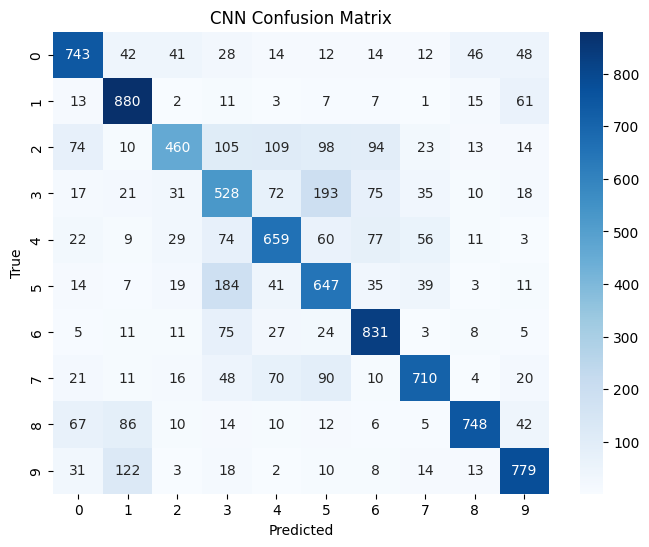

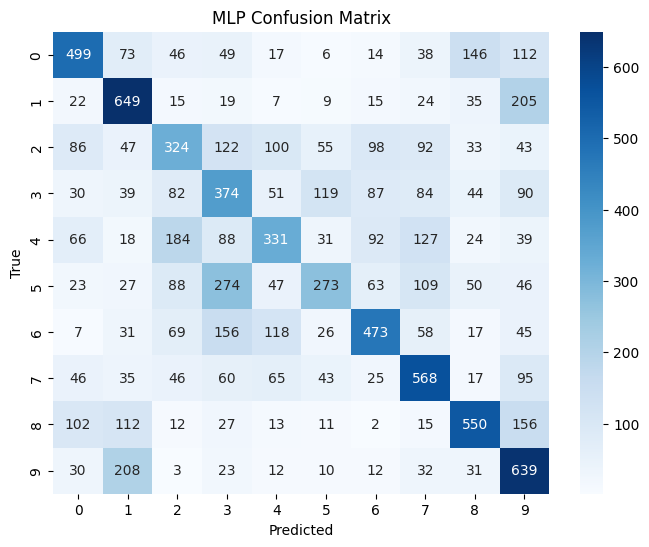

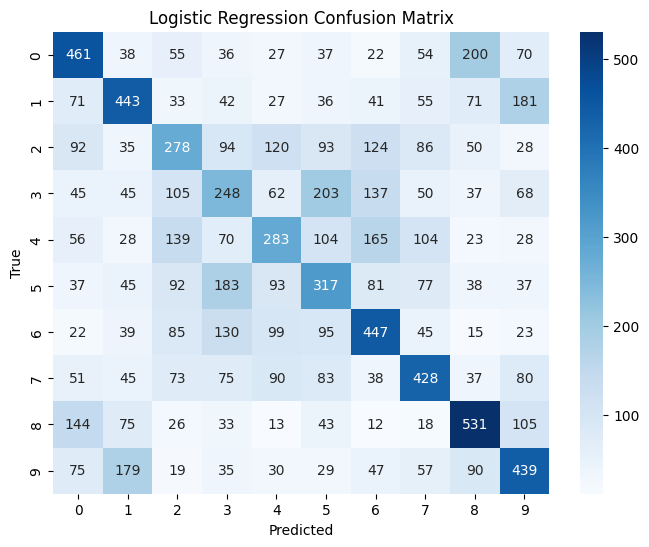

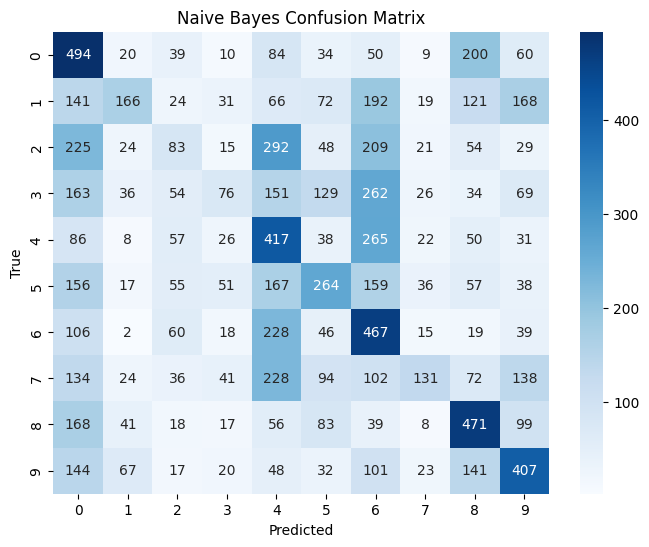

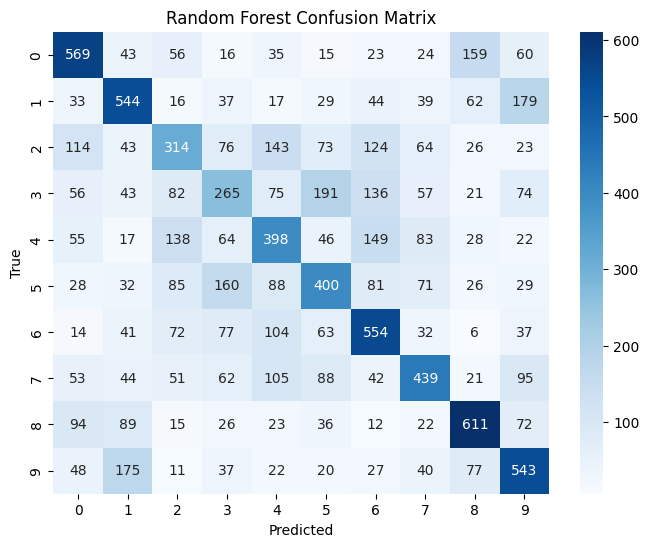

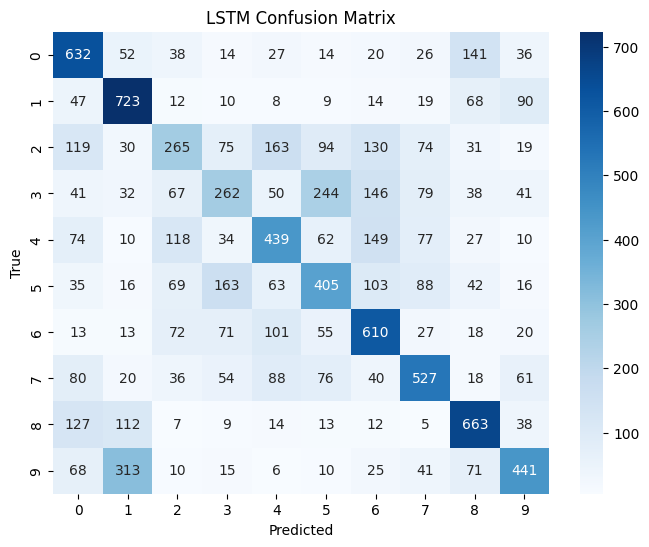

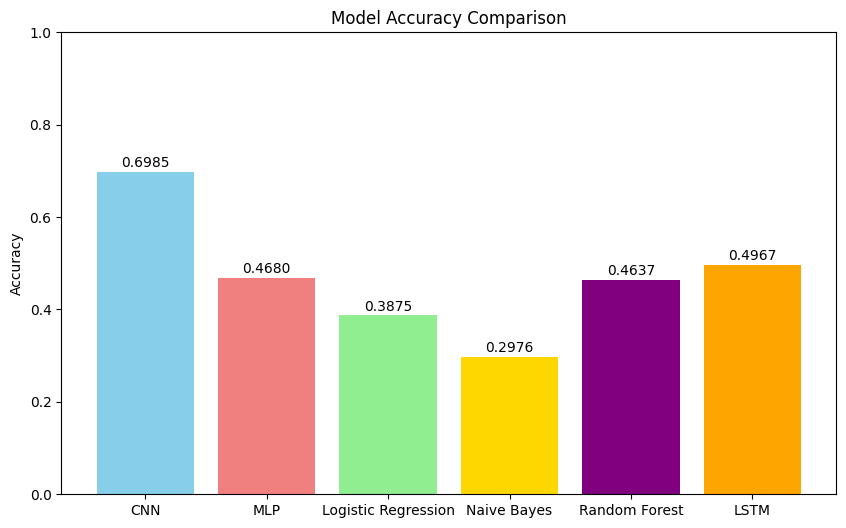

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images for non-CNN models
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# One-hot encode labels for CNN and MLP
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Reshape for LSTM
x_train_lstm = x_train.reshape(x_train.shape[0], 32, 32*3)
x_test_lstm = x_test.reshape(x_test.shape[0], 32, 32*3)


# ... (CNN and MLP code remains the same) ...
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

#Other Models

#Logistic Regression
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter
lr_model.fit(x_train_flat, y_train.ravel())
lr_pred = lr_model.predict(x_test_flat)


#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train_flat, y_train.ravel())
nb_pred = nb_model.predict(x_test_flat)


#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train_flat, y_train.ravel())
rf_pred = rf_model.predict(x_test_flat)


#LSTM
lstm_model = Sequential([
    LSTM(64, input_shape=(32, 32*3)),
    Dense(10, activation='softmax')
])
lstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])
lstm_model.fit(x_train_lstm, y_train, epochs=5, batch_size=64)  # Adjust epochs and batch_size as needed
lstm_pred = np.argmax(lstm_model.predict(x_test_lstm), axis=-1)


#... (Confusion matrix plotting functions remain the same)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Evaluation and plotting for other models

models = ['CNN', 'MLP', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'LSTM']
y_preds = [y_pred_cnn_classes, y_pred_mlp_classes, lr_pred, nb_pred, rf_pred, lstm_pred]
accuracies = []

for model_name, y_pred in zip(models, y_preds):
    accuracy = np.mean(y_pred == y_true_classes.ravel())
    accuracies.append(accuracy)
    plot_confusion_matrix(y_true_classes, y_pred, f"{model_name} Confusion Matrix")

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.ylim(0, 1)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Train shape: {x_train.shape}, {y_train.shape}")
print(f"Test shape: {x_test.shape}, {y_test.shape}")

Train shape: (50000, 32, 32, 3), (50000, 10)
Test shape: (10000, 32, 32, 3), (10000, 10)


In [ ]:
def split_data(x, y, num_clients):
    client_data = []
    shard_size = len(x) // num_clients
    for i in range(num_clients):
        start = i * shard_size
        end = start + shard_size
        client_data.append((x[start:end], y[start:end]))
    return client_data

# Split data for 3 clients
num_clients = 3
client_data = split_data(x_train, y_train, num_clients)

In [ ]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize the global model
global_model = create_model()

# Each local model starts with the same initial weights
initial_weights = global_model.get_weights()


In [ ]:
# Number of rounds for federated learning
num_rounds = 10
for round_num in range(num_rounds):
    print(f"Round {round_num + 1}/{num_rounds}")

    local_weights = []

    # Train on each client
    for client_id in range(num_clients):
        print(f"Training on client {client_id + 1}")

        # Create local model and set global weights
        local_model = create_model()
        local_model.set_weights(global_model.get_weights())

        # Get client data
        X, y = client_data[client_id]

        # Train local model
        local_model.fit(X, y, epochs=1, batch_size=32, verbose=0)

        # Collect local model weights
        local_weights.append(local_model.get_weights())

    # Federated averaging: Aggregate local weights
    averaged_weights = [np.mean([local_weights[j][i] for j in range(num_clients)], axis=0)
                        for i in range(len(local_weights[0]))]

    # Update global model weights
    global_model.set_weights(averaged_weights)

    # Evaluate the global model
    loss, accuracy = global_model.evaluate(x_test, y_test, verbose=0)
    print(f"Federated model accuracy after round {round_num + 1}: {accuracy:.4f}")


Round 1/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 1: 0.4422
Round 2/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 2: 0.5469
Round 3/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 3: 0.6170
Round 4/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 4: 0.6395
Round 5/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 5: 0.6636
Round 6/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 6: 0.6704
Round 7/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 7: 0.6743
Round 8/10
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 8: 0.6863
Round 9/10
Training on client 1


In [ ]:
# Get the final weights from the trained global model
global_model_parameters = global_model.get_weights()

# Use the final weights to evaluate
final_model = create_model()
final_model.set_weights(global_model_parameters)
loss, accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Federated model accuracy: {accuracy:.4f}")


Federated model accuracy: 0.7009


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


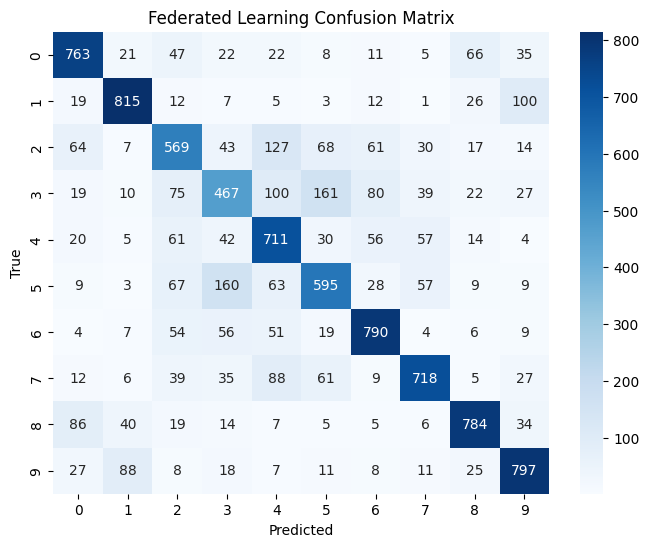

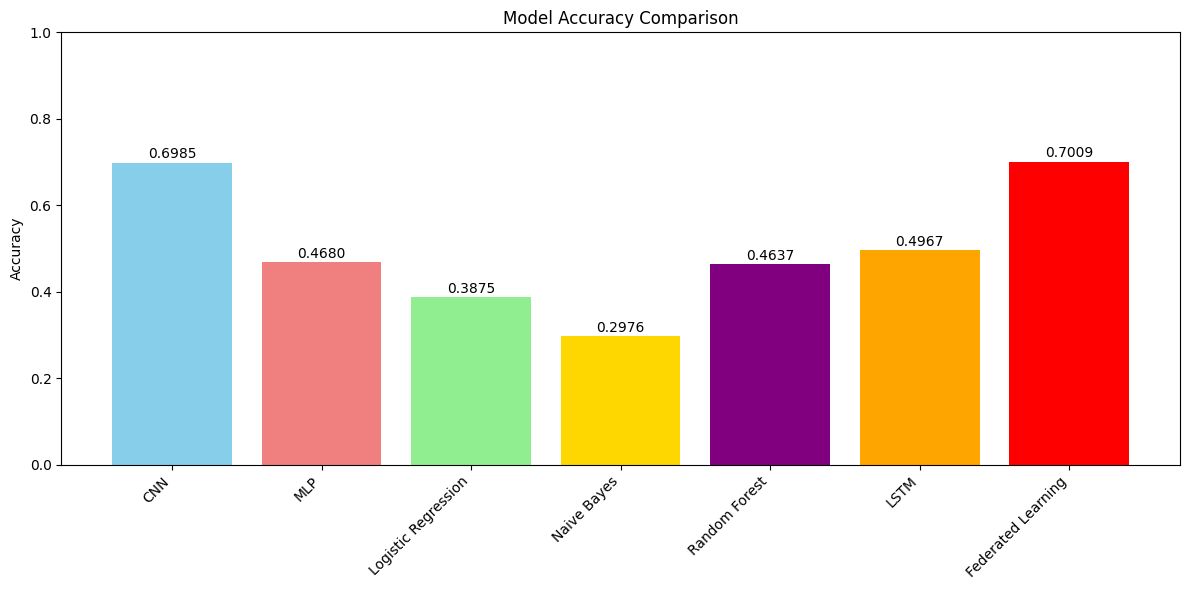

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true_classes and y_pred_federated are defined from your federated learning model
# Replace these with your actual predictions

# Example predictions (replace with your actual federated model predictions)
y_pred_federated = final_model.predict(x_test).argmax(axis=1)


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

#Plot confusion matrix for Federated Learning
plot_confusion_matrix(y_true_classes, y_pred_federated, "Federated Learning Confusion Matrix")


#Accuracy Comparison Bar Graph
models = ['CNN', 'MLP', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'LSTM', 'Federated Learning']
y_preds = [y_pred_cnn_classes, y_pred_mlp_classes, lr_pred, nb_pred, rf_pred, lstm_pred, y_pred_federated]
accuracies = []

for model_name, y_pred in zip(models, y_preds):
    accuracy = np.mean(y_pred == y_true_classes.ravel())
    accuracies.append(accuracy)

plt.figure(figsize=(12, 6)) # Increased figure size for better readability
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import pandas as pd

models = ['CNN', 'MLP', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'LSTM', 'Federated Learning']
model_objects = [cnn_model, mlp_model, lr_model, nb_model, rf_model, lstm_model, final_model]
y_preds = [y_pred_cnn_classes, y_pred_mlp_classes, lr_pred, nb_pred, rf_pred, lstm_pred, y_pred_federated]

results = []
for model_name, y_pred, model in zip(models, y_preds, model_objects):
    accuracy = accuracy_score(y_true_classes, y_pred)
    precision = precision_score(y_true_classes, y_pred, average='weighted')
    f1 = f1_score(y_true_classes, y_pred, average='weighted')

    # Handle predict_proba based on model type
    try:
        if hasattr(model, "predict_proba"):  # For sklearn models
            x_test_reshaped = x_test.reshape(x_test.shape[0], -1)  # Ensure 2D input
            y_pred_proba = model.predict_proba(x_test_reshaped)
        else:  # For deep learning models (TensorFlow/Keras or PyTorch)
            y_pred_proba = model.predict(x_test)

        roc_auc = roc_auc_score(y_true_classes, y_pred_proba, multi_class='ovr')
    except Exception as e:
        roc_auc = "N/A"  # Handle cases where probabilities are not available

    results.append([model_name, accuracy, precision, f1, roc_auc])

comparison_table = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'F1-score', 'ROC-AUC'])
print(comparison_table)


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                 Model  Accuracy  Precision  F1-score   ROC-AUC
0                  CNN    0.6985   0.705942  0.696903   0.95238
1                  MLP    0.4680   0.470895  0.462517  0.870211
2  Logistic Regression    0.3875   0.384408  0.385324  0.806058
3          Naive Bayes    0.2976   0.311214  0.275463  0.716959
4        Random Forest    0.4637   0.458680  0.459674  0.852293
5                 LSTM    0.4967   0.488169  0.486851       N/A
6   Federated Learning    0.7009   0.699788  0.699312  0.954023


In [ ]:

print(classification_report(y_true_classes, lr_pred))


              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1000
           1       0.46      0.44      0.45      1000
           2       0.31      0.28      0.29      1000
           3       0.26      0.25      0.25      1000
           4       0.34      0.28      0.31      1000
           5       0.30      0.32      0.31      1000
           6       0.40      0.45      0.42      1000
           7       0.44      0.43      0.43      1000
           8       0.49      0.53      0.51      1000
           9       0.41      0.44      0.43      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.39     10000
weighted avg       0.38      0.39      0.39     10000



In [ ]:
print(classification_report(y_true_classes, nb_pred))


              precision    recall  f1-score   support

           0       0.27      0.49      0.35      1000
           1       0.41      0.17      0.24      1000
           2       0.19      0.08      0.12      1000
           3       0.25      0.08      0.12      1000
           4       0.24      0.42      0.30      1000
           5       0.31      0.26      0.29      1000
           6       0.25      0.47      0.33      1000
           7       0.42      0.13      0.20      1000
           8       0.39      0.47      0.42      1000
           9       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.28     10000
weighted avg       0.31      0.30      0.28     10000



In [ ]:
print(classification_report(y_true_classes, rf_pred))


              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.51      0.54      0.53      1000
           2       0.37      0.31      0.34      1000
           3       0.32      0.27      0.29      1000
           4       0.39      0.40      0.40      1000
           5       0.42      0.40      0.41      1000
           6       0.46      0.55      0.51      1000
           7       0.50      0.44      0.47      1000
           8       0.59      0.61      0.60      1000
           9       0.48      0.54      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



In [ ]:
print(classification_report(y_true_classes, lstm_pred))


              precision    recall  f1-score   support

           0       0.51      0.63      0.57      1000
           1       0.55      0.72      0.62      1000
           2       0.38      0.27      0.31      1000
           3       0.37      0.26      0.31      1000
           4       0.46      0.44      0.45      1000
           5       0.41      0.41      0.41      1000
           6       0.49      0.61      0.54      1000
           7       0.55      0.53      0.54      1000
           8       0.59      0.66      0.63      1000
           9       0.57      0.44      0.50      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000



In [ ]:
print(classification_report(y_true_classes, y_pred_federated))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.81      0.81      0.81      1000
           2       0.60      0.57      0.58      1000
           3       0.54      0.47      0.50      1000
           4       0.60      0.71      0.65      1000
           5       0.62      0.59      0.61      1000
           6       0.75      0.79      0.77      1000
           7       0.77      0.72      0.74      1000
           8       0.80      0.78      0.79      1000
           9       0.75      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


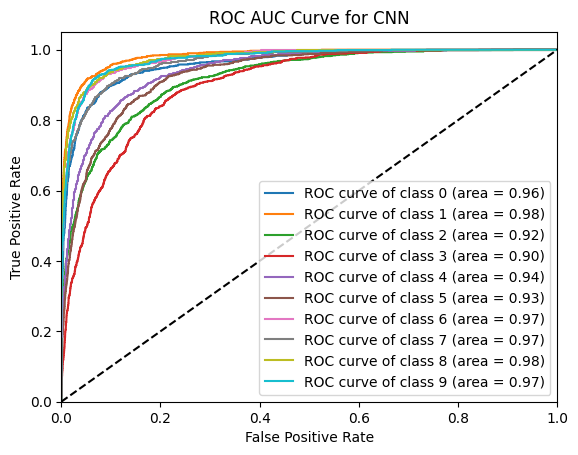

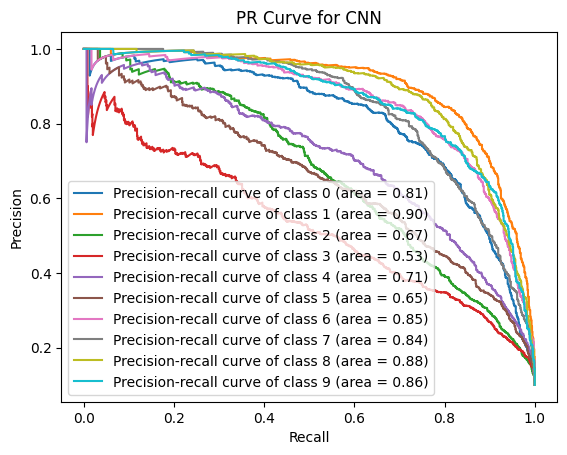

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


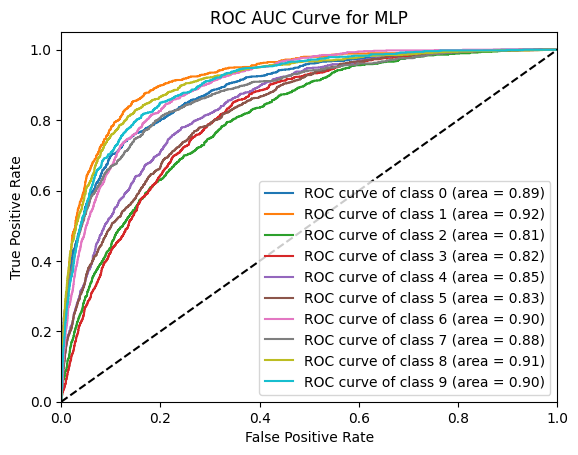

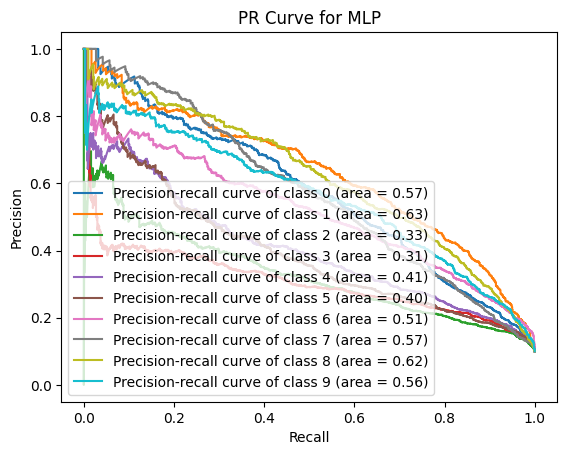

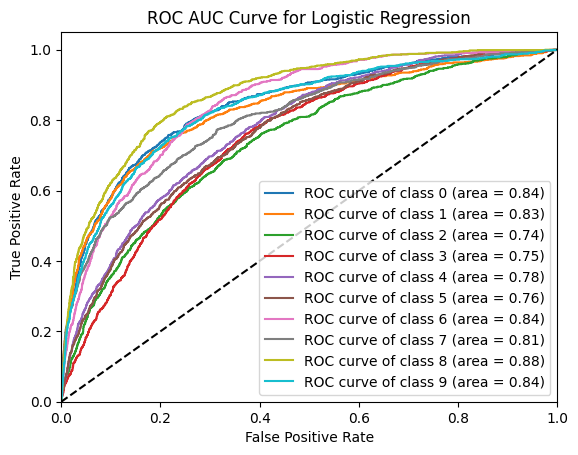

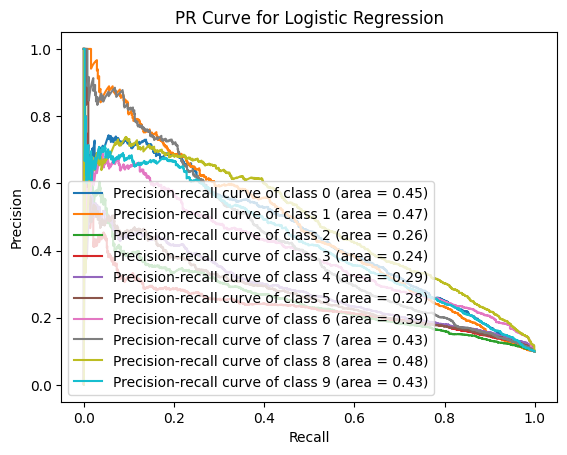

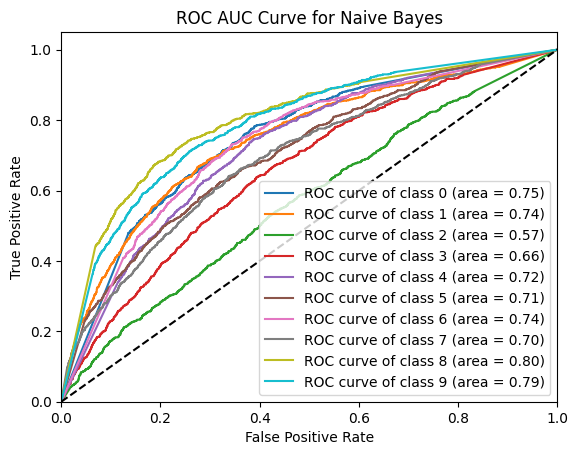

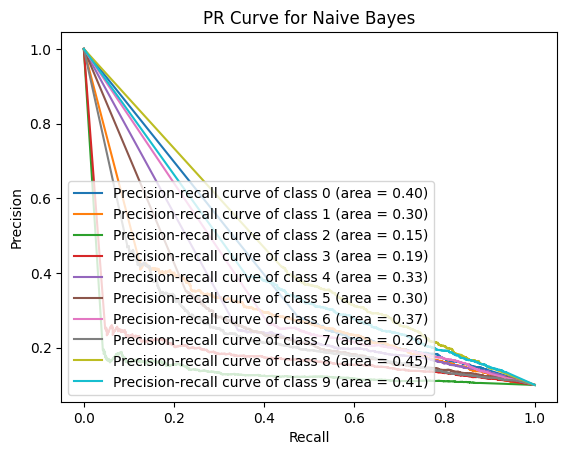

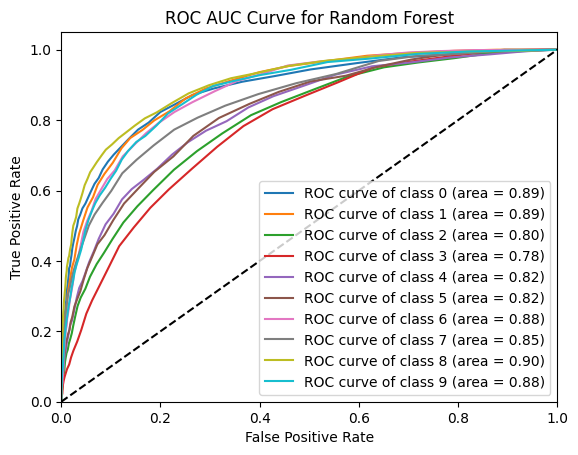

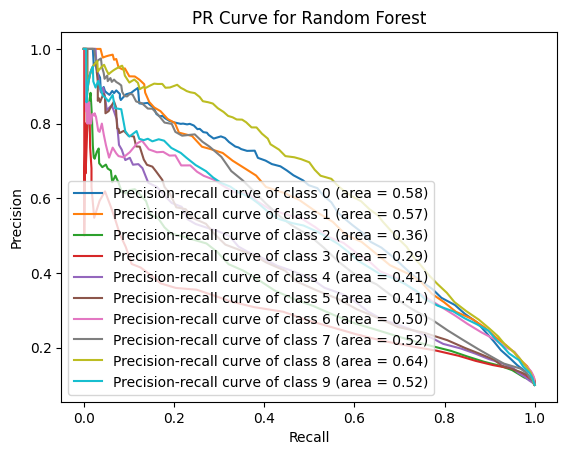

Error generating curves for LSTM: Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


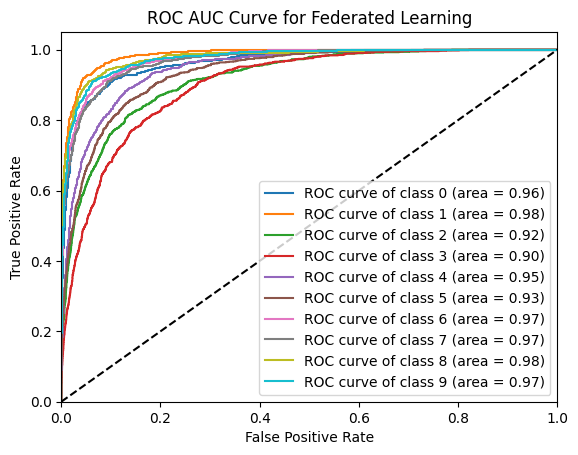

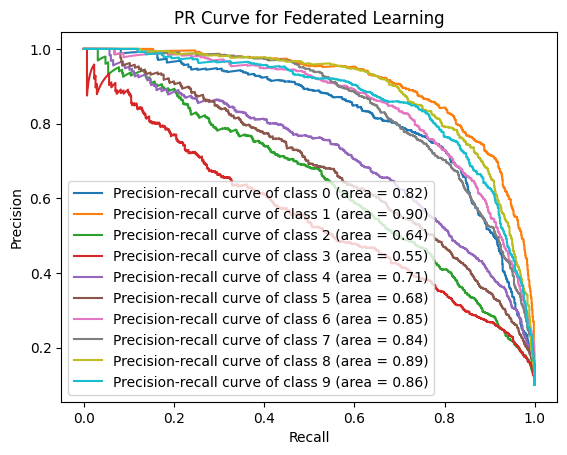

In [ ]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

models = ['CNN', 'MLP', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'LSTM', 'Federated Learning']
model_objects = [cnn_model, mlp_model, lr_model, nb_model, rf_model, lstm_model, final_model]
y_preds = [y_pred_cnn, y_pred_mlp, lr_pred, nb_pred, rf_pred, lstm_pred, y_pred_federated]


for model_name, y_pred, model in zip(models, y_preds, model_objects):
    try:
        if hasattr(model, "predict_proba"):
            x_test_reshaped = x_test.reshape(x_test.shape[0], -1)
            y_score = model.predict_proba(x_test_reshaped)
        else:
            y_score = model.predict(x_test)

        # ROC AUC
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(10):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        for i in range(10):
            plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC AUC Curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        #PR Curve
        precision = dict()
        recall = dict()
        average_precision = dict()

        for i in range(10):
            precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
            average_precision[i] = auc(recall[i], precision[i])

        plt.figure()
        for i in range(10):
            plt.plot(recall[i], precision[i],
                    label=f'Precision-recall curve of class {i} (area = {average_precision[i]:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'PR Curve for {model_name}')
        plt.legend(loc="lower left")
        plt.show()

    except Exception as e:
        print(f"Error generating curves for {model_name}: {e}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import pandas as pd

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# CNN Model
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(x_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(x_test_cnn, y_test))

# Evaluate CNN
cnn_accuracy = model_cnn.evaluate(x_test_cnn, y_test)[1]
print("CNN Accuracy:", cnn_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8439 - loss: 0.4984 - val_accuracy: 0.9831 - val_loss: 0.0512
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9744 - loss: 0.0847 - val_accuracy: 0.9871 - val_loss: 0.0363
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0627 - val_accuracy: 0.9905 - val_loss: 0.0275
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9904 - val_loss: 0.0288
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9866 - loss: 0.0413 - val_accuracy: 0.9915 - val_loss: 0.0263
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0336
CNN Accuracy: 0.9915000200271606


In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 784-dimensional vector
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"MLP Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8758 - loss: 0.4411 - val_accuracy: 0.9594 - val_loss: 0.1353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9645 - loss: 0.1202 - val_accuracy: 0.9685 - val_loss: 0.1002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0801 - val_accuracy: 0.9747 - val_loss: 0.0817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9771 - val_loss: 0.0739
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0449 - val_accuracy: 0.9763 - val_loss: 0.0750
MLP Accuracy: 0.9763000011444092


In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def split_data(x, y, num_clients):
    client_data = []
    shard_size = len(x) // num_clients
    for i in range(num_clients):
        start = i * shard_size
        end = start + shard_size
        client_data.append((x[start:end], y[start:end]))
    return client_data

# Split data for 3 clients
num_clients = 3
client_data = split_data(x_train, y_train, num_clients)

# Initialize the global model
global_model = create_cnn_model()

# Number of rounds for federated learning
num_rounds = 5  # Reduced for demonstration
for round_num in range(num_rounds):
    print(f"Round {round_num + 1}/{num_rounds}")
    local_weights = []
    for client_id in range(num_clients):
        print(f"Training on client {client_id + 1}")
        local_model = create_cnn_model()
        local_model.set_weights(global_model.get_weights())
        X, y = client_data[client_id]
        local_model.fit(X, y, epochs=1, batch_size=32, verbose=0)
        local_weights.append(local_model.get_weights())
    averaged_weights = [np.mean([local_weights[j][i] for j in range(num_clients)], axis=0)
                        for i in range(len(local_weights[0]))]
    global_model.set_weights(averaged_weights)
    loss, accuracy = global_model.evaluate(x_test, y_test, verbose=0)
    print(f"Federated model accuracy after round {round_num + 1}: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Round 1/5
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 1: 0.9736
Round 2/5
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 2: 0.9827
Round 3/5
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 3: 0.9873
Round 4/5
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 4: 0.9882
Round 5/5
Training on client 1
Training on client 2
Training on client 3
Federated model accuracy after round 5: 0.9895


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess Data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train_flat = x_train.reshape(len(x_train), -1)  # Flatten for ML models
x_test_flat = x_test.reshape(len(x_test), -1)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_flat, y_train)
y_pred_log = log_reg.predict(x_test_flat)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Naïve Bayes
nb = GaussianNB()
nb.fit(x_train_flat, y_train)
y_pred_nb = nb.predict(x_test_flat)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_flat, y_train)
y_pred_rf = rf.predict(x_test_flat)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# LSTM Model
x_train_lstm = x_train.reshape(-1, 28, 28)  # Reshape for LSTM
x_test_lstm = x_test.reshape(-1, 28, 28)

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(28, 28)),
    LSTM(64),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_lstm, y_train, epochs=5, batch_size=64, validation_data=(x_test_lstm, y_test))

# Evaluate LSTM
lstm_accuracy = model.evaluate(x_test_lstm, y_test)[1]
print("LSTM Accuracy:", lstm_accuracy)


Logistic Regression Accuracy: 0.9258
Naïve Bayes Accuracy: 0.5558
Random Forest Accuracy: 0.9715


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7445 - loss: 0.7748 - val_accuracy: 0.9631 - val_loss: 0.1203
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9645 - loss: 0.1187 - val_accuracy: 0.9733 - val_loss: 0.0869
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9773 - loss: 0.0741 - val_accuracy: 0.9801 - val_loss: 0.0642
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9828 - val_loss: 0.0567
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9872 - loss: 0.0443 - val_accuracy: 0.9797 - val_loss: 0.0631
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9730 - loss: 0.0840
LSTM Accuracy: 0.9797000288963318


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


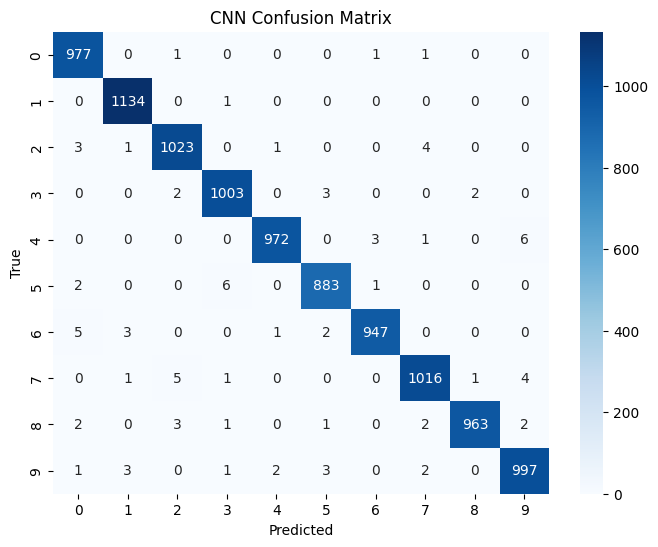

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


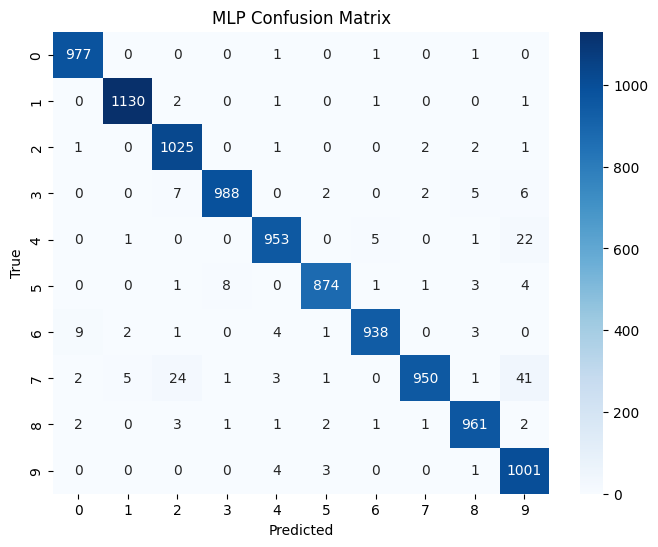

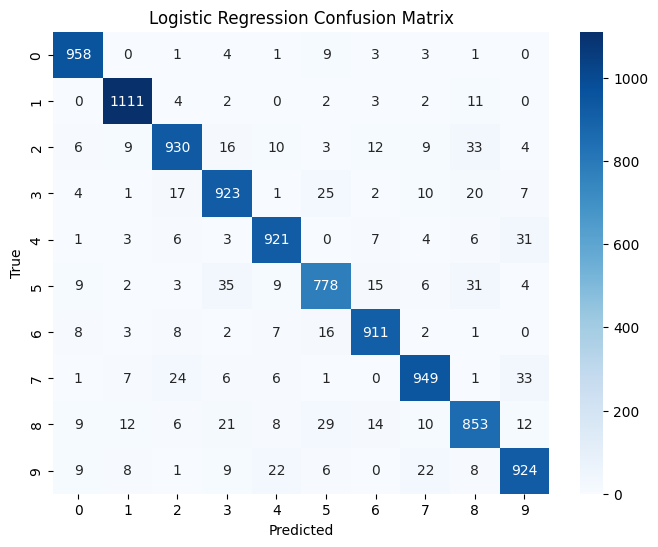

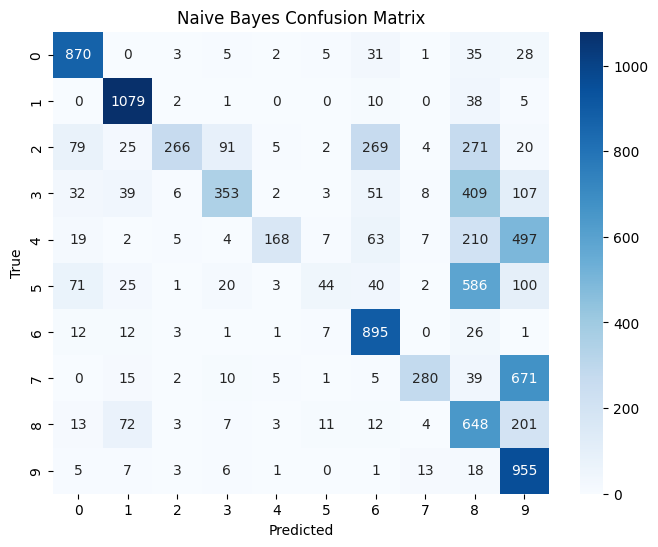

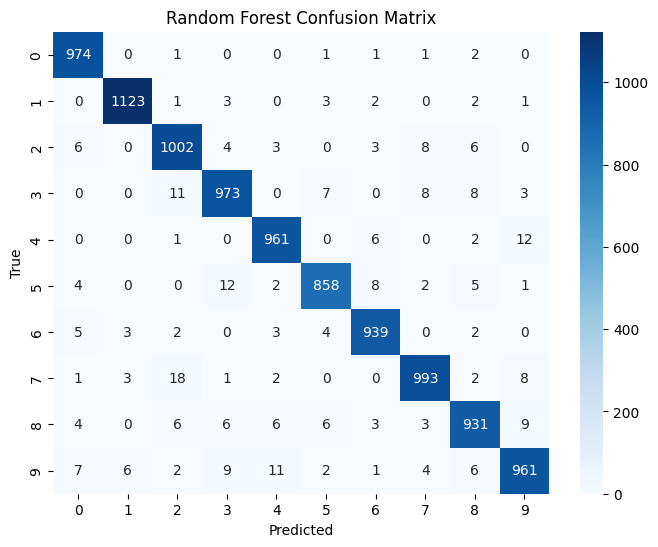

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


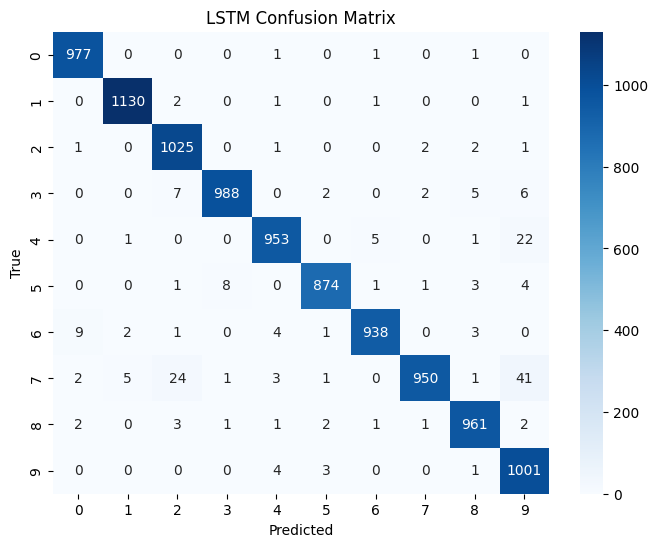

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_true_classes and y_pred_cnn_classes, y_pred_mlp_classes, lr_pred, nb_pred, rf_pred, lstm_pred are defined
# Replace these with your actual predictions for each model.

# Example: Assuming you have predictions from a CNN model
y_true_classes = y_test # Assuming y_test is one-hot encoded
y_pred_cnn_classes = model_cnn.predict(x_test_cnn).argmax(axis=1)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

#Plot confusion matrix for CNN
plot_confusion_matrix(y_true_classes, y_pred_cnn_classes, "CNN Confusion Matrix")

#Plot confusion matrix for MLP
y_pred_mlp_classes = model.predict(x_test).argmax(axis=1) # Assuming 'model' is your MLP model
plot_confusion_matrix(y_true_classes, y_pred_mlp_classes, "MLP Confusion Matrix")

#Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_true_classes, y_pred_log, "Logistic Regression Confusion Matrix")

#Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_true_classes, y_pred_nb, "Naive Bayes Confusion Matrix")

#Plot confusion matrix for Random Forest
plot_confusion_matrix(y_true_classes, y_pred_rf, "Random Forest Confusion Matrix")

#Plot confusion matrix for LSTM
y_pred_lstm = model.predict(x_test_lstm).argmax(axis=1) # Assuming 'model' is your LSTM model
plot_confusion_matrix(y_true_classes, y_pred_lstm, "LSTM Confusion Matrix")


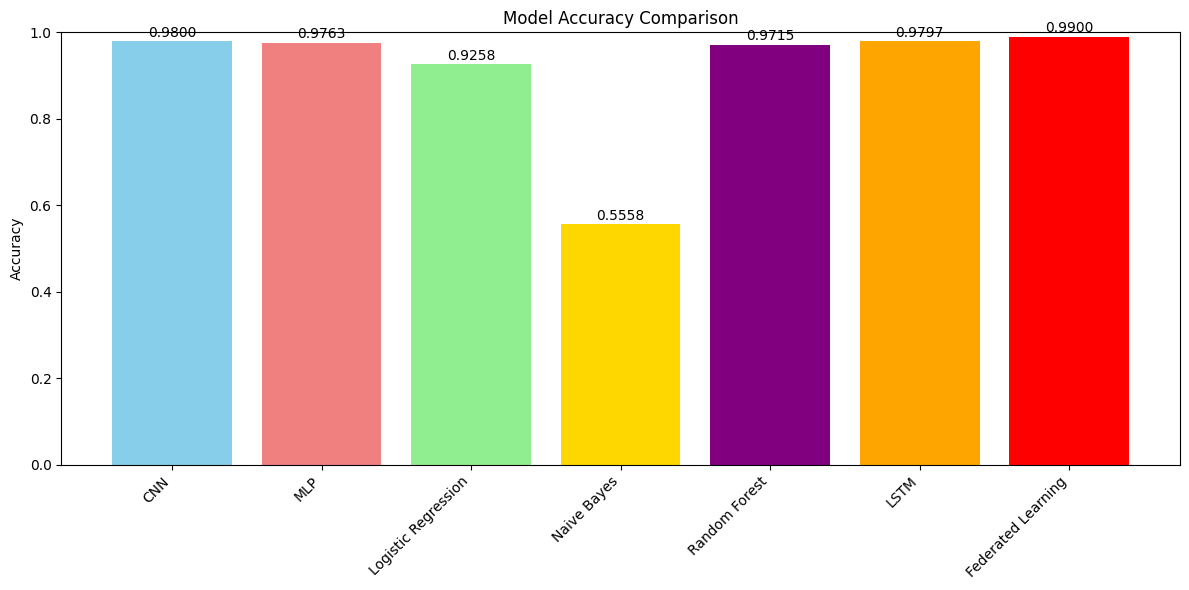

In [ ]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual accuracy values)
models = ['CNN', 'MLP', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'LSTM', 'Federated Learning']
accuracies = [0.98, 0.9763, 0.9258, 0.5558, 0.9715, 0.9797, 0.99]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping


# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess Data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train_flat = x_train.reshape(len(x_train), -1)  # Flatten for ML models
x_test_flat = x_test.reshape(len(x_test), -1)

# Function to compute metrics
def compute_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    auc_roc = roc_auc_score(pd.get_dummies(y_true), pd.get_dummies(y_pred), multi_class='ovr')
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"],
        "AUC-ROC": auc_roc
    }

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_flat, y_train)
y_pred_log = log_reg.predict(x_test_flat)
log_metrics = compute_metrics(y_test, y_pred_log, "Logistic Regression")

# Naïve Bayes
nb = GaussianNB()
nb.fit(x_train_flat, y_train)
y_pred_nb = nb.predict(x_test_flat)
nb_metrics = compute_metrics(y_test, y_pred_nb, "Naïve Bayes")

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_flat, y_train)
y_pred_rf = rf.predict(x_test_flat)
rf_metrics = compute_metrics(y_test, y_pred_rf, "Random Forest")

# LSTM Model
x_train_lstm = x_train.reshape(-1, 28, 28)  # Reshape for LSTM
x_test_lstm = x_test.reshape(-1, 28, 28)

model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(28, 28)),
    LSTM(64),
    Dense(10, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(x_train_lstm, y_train, epochs=5, batch_size=64, validation_data=(x_test_lstm, y_test))

# Evaluate LSTM
y_pred_lstm = np.argmax(model_lstm.predict(x_test_lstm), axis=1)
lstm_metrics = compute_metrics(y_test, y_pred_lstm, "LSTM")

# CNN Model
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(x_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(x_test_cnn, y_test))

# Evaluate CNN
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=1)
cnn_metrics = compute_metrics(y_test, y_pred_cnn, "CNN")

# Simulated Federated Learning (Decentralized Training)
def federated_training(model, x_data, y_data, num_splits=5, epochs=1):
    split_data = np.array_split(x_data, num_splits)
    split_labels = np.array_split(y_data, num_splits)
    for i in range(num_splits):
        model.fit(split_data[i], split_labels[i], epochs=epochs, verbose=0)
    return model

# Apply Federated Learning to CNN
model_fed = keras.models.clone_model(model_cnn)
model_fed.set_weights(model_cnn.get_weights())
# Compile the cloned model before using it for federated training
model_fed.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
federated_training(model_fed, x_train_cnn, y_train, num_splits=5, epochs=1)
y_pred_fed = np.argmax(model_fed.predict(x_test_cnn), axis=1)
fed_metrics = compute_metrics(y_test, y_pred_fed, "Federated")

# Create metrics table
metrics_df = pd.DataFrame([log_metrics, nb_metrics, rf_metrics, lstm_metrics, cnn_metrics, fed_metrics])
print(metrics_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7442 - loss: 0.7669 - val_accuracy: 0.9547 - val_loss: 0.1424
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9631 - loss: 0.1235 - val_accuracy: 0.9734 - val_loss: 0.0876
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9764 - loss: 0.0805 - val_accuracy: 0.9777 - val_loss: 0.0733
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.9820 - val_loss: 0.0559
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9851 - val_loss: 0.0487
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8422 - loss: 0.4988 - val_accuracy: 0.9822 - val_loss: 0.0497
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9738 - loss: 0.0912 - val_accuracy: 0.9875 - val_loss: 0.0374
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9823 - loss: 0.0587 - val_accuracy: 0.9890 - val_loss: 0.0318
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9851 - loss: 0.0513 - val_accuracy: 0.9909 - val_loss: 0.0253
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9911 - val_loss: 0.0266
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                 Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
0  Logistic Regression    0.9258   0.925587  0.9258  0.925622  0.958237
1          Naïve Bayes    0.5558   0.691726  0.5558  0.517042  0.749562
2        Random Forest    0.9698   0.969797  0.9698  0.969778  0.98

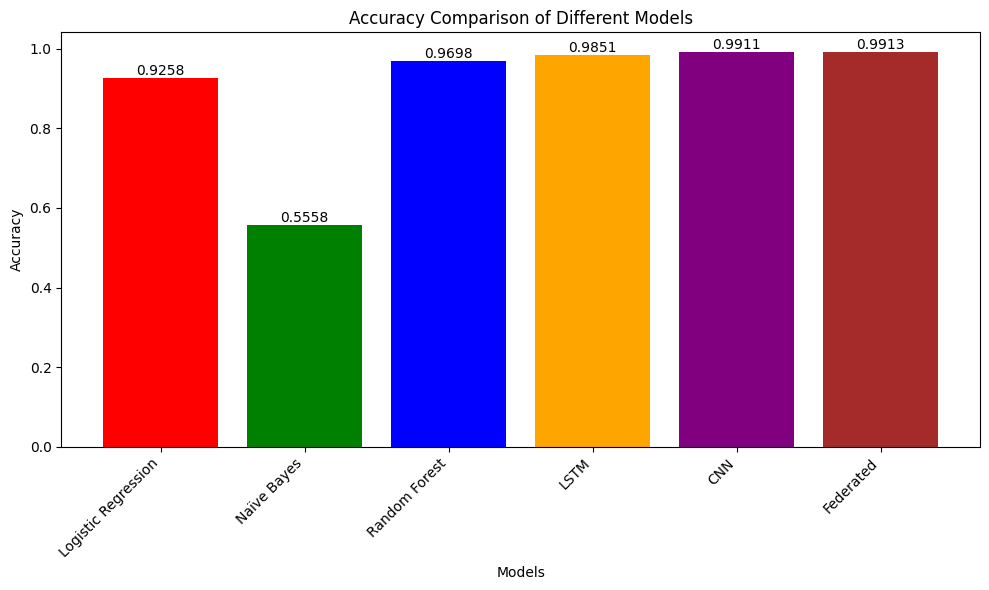

In [ ]:
import matplotlib.pyplot as plt



models = metrics_df["Model"]
accuracy = metrics_df["Accuracy"]

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color=colors)


for bar, acc in zip(bars, accuracy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{acc:.4f}", ha='center', va='bottom')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
